In [1]:
# prepare data 
import pandas as pd
import numpy as np
train = pd.read_csv('spam_train.csv')
test = pd.read_csv('spam_test.csv')
## separate the predictors and response in the training data set
x_train = np.array(train.iloc[:, 0:57])
y_train = np.ravel(train.iloc[:, -1])
## separate the predictors and response in the test data set
x_test = np.array(test.iloc[:, 0:57])
y_test = np.ravel(test.iloc[:, -1])

In [2]:
train.head()

,A.1,A.2,A.3,A.4,A.5,A.6,A.7,A.8,A.9,A.10,...,A.49,A.50,A.51,A.52,A.53,A.54,A.55,A.56,A.57,spam
0,0.32,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.0,0.234,0.0,0.058,0.0,0.0,1.068,3,47,email
1,0.00,0.0,0.71,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.342,0.0,0.0,1.000,1,31,email
2,0.00,0.0,0.00,0.0,0.00,0.17,0.0,0.0,0.0,0.0,...,0.0,0.055,0.0,0.000,0.0,0.0,1.685,7,204,email
3,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.000,0.0,0.0,1.800,5,9,email
4,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.471,0.0,0.000,0.0,0.0,1.424,8,47,email


In [3]:
train.shape

(2300, 58)

In [4]:
test.shape

(2301, 58)

In [5]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
print "The training error is: %.5f" %(1-tree_model.score(x_train, y_train))
print "The test     error is: %.5f" %(1-tree_model.score(x_test, y_test))

The training error is: 0.00043
The test     error is: 0.09952


In [6]:
tree_model
#http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [7]:
feature_imprtance = zip(train.columns[:-2], tree_model.feature_importances_)
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_imprtance = np.array(feature_imprtance, dtype = dtype)
feature_sort = np.sort(feature_imprtance, order='importance')[::-1]
feature_sort

array([('A.53', 0.3223766329367802), ('A.7', 0.17003175360850453),
       ('A.52', 0.0861158411727707), ('A.25', 0.06949770067234269),
       ('A.55', 0.032378510343003535), ('A.16', 0.02773903333673073),
       ('A.56', 0.026548183523085658), ('A.19', 0.018803019378488963),
       ('A.46', 0.018451639879318384), ('A.5', 0.01544331796131112),
       ('A.21', 0.014932962411667769), ('A.10', 0.01339397804379201),
       ('A.45', 0.013376660973317477), ('A.50', 0.013040331239923743),
       ('A.39', 0.012071304419586803), ('A.8', 0.010344206207894861),
       ('A.24', 0.009440320248195622), ('A.18', 0.007669482658742127),
       ('A.11', 0.0072037024447399855), ('A.23', 0.006840015592416773),
       ('A.17', 0.005436107978309906), ('A.42', 0.0051702917730658765),
       ('A.49', 0.003950160964490621), ('A.27', 0.0037540659269403834),
       ('A.43', 0.0035612229405218372), ('A.51', 0.0034970675921820356),
       ('A.1', 0.003089068311404876), ('A.9', 0.002981358416172833),
       ('A.12',

In [8]:
# grid search
# min_samples_split: The minimum number of samples required to split an internal node:
# min_samples_leaf:The minimum number of samples required to be at a leaf node
import sklearn.grid_search as gs
np.random.seed(108)
grid_para_tree = [{"criterion": ["gini", "entropy"], "min_samples_leaf": range(1, 10),
                   "min_samples_split": range(2, 30, 2)}]
grid_search_tree = gs.GridSearchCV(tree_model, grid_para_tree, cv=5,
                                   scoring='accuracy')
grid_search_tree.fit(x_train, y_train)

/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [9]:
## best parameter
grid_search_tree.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 28}

In [10]:
## best score
grid_search_tree.best_score_

0.9143478260869565

In [11]:
## The overall accuracy on the training set:
grid_search_tree.score(x_train, y_train)

/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:438: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


0.95739130434782604

In [12]:
## The overall accuracy on the test set:
grid_search_tree.score(x_test, y_test)

0.90830073880921336

In [13]:
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()

In [14]:
randomForest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [15]:
np.random.seed(1)
randomForest.set_params(n_estimators=50)
randomForest.fit(x_train, y_train)
print "The training error of random forest is: %.5f" %(1-randomForest.score(x_train, y_train))
print "The test     error of random forest is: %.5f" %(1-randomForest.score(x_test, y_test))

The training error of random forest is: 0.00043
The test     error of random forest is: 0.05780


In [16]:
feature_imprtance = zip(train.columns[:-2], randomForest.feature_importances_)
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_imprtance = np.array(feature_imprtance, dtype = dtype)
feature_sort = np.sort(feature_imprtance, order='importance')[::-1]
feature_sort

array([('A.52', 0.13703054014879038), ('A.53', 0.10138275637238126),
       ('A.55', 0.080019529879591), ('A.7', 0.07750593621455441),
       ('A.21', 0.053417504303190234), ('A.16', 0.04871844276061167),
       ('A.56', 0.046098576895094265), ('A.25', 0.04030202822924379),
       ('A.24', 0.03686407569353951), ('A.5', 0.03659687451362182),
       ('A.19', 0.027636190695141755), ('A.23', 0.017168691881403884),
       ('A.27', 0.01650388530054146), ('A.17', 0.0148649834599953),
       ('A.46', 0.014123461853311165), ('A.11', 0.013884966143222854),
       ('A.26', 0.013415530018130999), ('A.50', 0.012216009377617347),
       ('A.8', 0.011701511500561), ('A.37', 0.011197826428211767),
       ('A.12', 0.010480104050571036), ('A.18', 0.009621385996535734),
       ('A.45', 0.009262299436612014), ('A.3', 0.008674586950899718),
       ('A.10', 0.008143663033822145), ('A.6', 0.007181492386500117),
       ('A.28', 0.005834877341539431), ('A.49', 0.005789253991879822),
       ('A.35', 0.005715997

In [17]:
np.random.seed(1)
# max_feature: feature considered for splitting
# n_estimators: number of tree
# min_samples_split: The minimum number of samples required to split an internal node:
# min_samples_leaf: The minimum number of samples required to be at a leaf node

grid_para_forest = [{"n_estimators": [10, 50, 100], "criterion": ["gini", "entropy"], \
                    "min_samples_leaf": range(1, 10), "min_samples_split": range(2, 30, 2)}]
grid_search_forest = gs.GridSearchCV(randomForest, grid_para_forest, scoring='accuracy', cv=5)
grid_search_forest.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 50, 100], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [18]:
grid_search_forest.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 50}

In [19]:
grid_search_forest.best_score_

0.9469565217391305

In [20]:
print "The training error is: %.5f"%(1-grid_search_forest.score(x_train, y_train))
print "The test     error is: %.5f"%(1-grid_search_forest.score(x_test, y_test))

The training error is: 0.00696
The test     error is: 0.05693


In [23]:
from sklearn.ensemble import GradientBoostingClassifier
GBM=GradientBoostingClassifier()
np.random.seed(1)
GBM.set_params(n_estimators=50)
GBM.fit(x_train, y_train)
print "The training error of gradient boosting is: %.5f" %(1-GBM.score(x_train, y_train))
print "The test     error of gradient boosting is: %.5f" %(1-GBM.score(x_test, y_test))

The training error of gradient boosting is: 0.04609
The test     error of gradient boosting is: 0.06562


In [28]:
GBM.predict(x_train)

array(['email', 'email', 'email', ..., 'email', 'email', 'spam'], dtype=object)

In [30]:
GBM.predict_proba(x_train)[:,1]

array([ 0.0333752 ,  0.17857711,  0.04552774, ...,  0.0943025 ,
        0.08174416,  0.97825915])

In [67]:
# tuning parameters
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV 
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

def modelfit(alg, x_train, y_train, train, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(x_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(x_train)
    dtrain_predprob = alg.predict_proba(x_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, x_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(y_train, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob)
    
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_,train.columns[:-1]).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [18]:
Y_train=[1 if x=='spam' else 0 for x in y_train]

In [69]:
Y_train

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,



Model Report
Accuracy : 0.9678
AUC Score (Train): 0.995170
CV Score : Mean - 0.9834704 | Std - 0.004705594 | Min - 0.9773105 | Max - 0.9902308


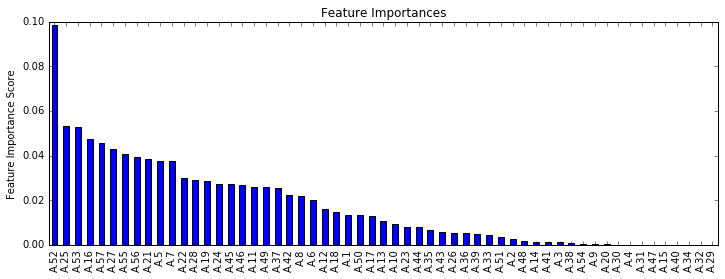

In [70]:
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, x_train, Y_train, train)

In [71]:
# Fix learning rate and number of estimators for tuning tree-based parameters
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(x_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=50,
              min_samples_split=500, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [72]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.96913, std: 0.00599, params: {'n_estimators': 20},
  mean: 0.97359, std: 0.00491, params: {'n_estimators': 30},
  mean: 0.97703, std: 0.00516, params: {'n_estimators': 40},
  mean: 0.97919, std: 0.00507, params: {'n_estimators': 50},
  mean: 0.98148, std: 0.00473, params: {'n_estimators': 60},
  mean: 0.98258, std: 0.00480, params: {'n_estimators': 70},
  mean: 0.98330, std: 0.00480, params: {'n_estimators': 80}],
 {'n_estimators': 80},
 0.9832963381633849)

In [ ]:
# best n_estimators: 80

In [74]:
# fix # of trees tune max_depth, min_samples_split
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(x_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.98363, std: 0.00547, params: {'min_samples_split': 200, 'max_depth': 5},
  mean: 0.98318, std: 0.00569, params: {'min_samples_split': 400, 'max_depth': 5},
  mean: 0.98207, std: 0.00561, params: {'min_samples_split': 600, 'max_depth': 5},
  mean: 0.98127, std: 0.00559, params: {'min_samples_split': 800, 'max_depth': 5},
  mean: 0.98044, std: 0.00510, params: {'min_samples_split': 1000, 'max_depth': 5},
  mean: 0.98426, std: 0.00556, params: {'min_samples_split': 200, 'max_depth': 7},
  mean: 0.98370, std: 0.00560, params: {'min_samples_split': 400, 'max_depth': 7},
  mean: 0.98295, std: 0.00530, params: {'min_samples_split': 600, 'max_depth': 7},
  mean: 0.98193, std: 0.00572, params: {'min_samples_split': 800, 'max_depth': 7},
  mean: 0.98031, std: 0.00532, params: {'min_samples_split': 1000, 'max_depth': 7},
  mean: 0.98425, std: 0.00473, params: {'min_samples_split': 200, 'max_depth': 9},
  mean: 0.98390, std: 0.00507, params: {'min_samples_split': 400, 'max_depth': 9},
  

In [75]:
# 'n_estimators': 80, 'max_depth': 15, 'min_samples_split': 200

In [81]:
param_test3 = {'min_samples_leaf':range(10,30,2)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,
                                                               max_depth=15, min_samples_split=200,
                                                               max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(x_train, Y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.98505, std: 0.00555, params: {'min_samples_leaf': 10},
  mean: 0.98555, std: 0.00523, params: {'min_samples_leaf': 12},
  mean: 0.98610, std: 0.00506, params: {'min_samples_leaf': 14},
  mean: 0.98577, std: 0.00549, params: {'min_samples_leaf': 16},
  mean: 0.98571, std: 0.00496, params: {'min_samples_leaf': 18},
  mean: 0.98564, std: 0.00498, params: {'min_samples_leaf': 20},
  mean: 0.98502, std: 0.00536, params: {'min_samples_leaf': 22},
  mean: 0.98512, std: 0.00505, params: {'min_samples_leaf': 24},
  mean: 0.98471, std: 0.00567, params: {'min_samples_leaf': 26},
  mean: 0.98487, std: 0.00513, params: {'min_samples_leaf': 28}],
 {'min_samples_leaf': 14},
 0.9861003777038423)

In [85]:
param_test4 = {'max_features':range(2,20,1)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,
                                                               max_depth=15, min_samples_split=200,
                                                               min_samples_leaf=14, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(x_train, Y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.98374, std: 0.00578, params: {'max_features': 2},
  mean: 0.98497, std: 0.00511, params: {'max_features': 3},
  mean: 0.98543, std: 0.00545, params: {'max_features': 4},
  mean: 0.98531, std: 0.00433, params: {'max_features': 5},
  mean: 0.98480, std: 0.00589, params: {'max_features': 6},
  mean: 0.98610, std: 0.00506, params: {'max_features': 7},
  mean: 0.98517, std: 0.00521, params: {'max_features': 8},
  mean: 0.98530, std: 0.00519, params: {'max_features': 9},
  mean: 0.98524, std: 0.00554, params: {'max_features': 10},
  mean: 0.98497, std: 0.00526, params: {'max_features': 11},
  mean: 0.98525, std: 0.00524, params: {'max_features': 12},
  mean: 0.98512, std: 0.00553, params: {'max_features': 13},
  mean: 0.98481, std: 0.00514, params: {'max_features': 14},
  mean: 0.98536, std: 0.00537, params: {'max_features': 15},
  mean: 0.98550, std: 0.00607, params: {'max_features': 16},
  mean: 0.98492, std: 0.00528, params: {'max_features': 17},
  mean: 0.98505, std: 0.00503, p

In [90]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,
                                                               max_depth=15,min_samples_split=200, 
                                                               min_samples_leaf=14,random_state=10,
                                                               max_features=7),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(x_train, Y_train)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.98400, std: 0.00580, params: {'subsample': 0.6},
  mean: 0.98523, std: 0.00506, params: {'subsample': 0.7},
  mean: 0.98560, std: 0.00581, params: {'subsample': 0.75},
  mean: 0.98610, std: 0.00506, params: {'subsample': 0.8},
  mean: 0.98525, std: 0.00560, params: {'subsample': 0.85},
  mean: 0.98544, std: 0.00474, params: {'subsample': 0.9}],
 {'subsample': 0.8},
 0.9861003777038423)

In [91]:
# increase trees and decrease learning rate
param_test6 = {'n_estimators':range(100,1000,100), 'learning_rate': [0.1, 0.05, 0.01]}
gsearch6 = GridSearchCV(estimator = GradientBoostingClassifier(max_depth=15,min_samples_split=200, 
                                                               min_samples_leaf=14, subsample=0.8, 
                                                               random_state=10,max_features=7),
param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(x_train, Y_train)
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.98626, std: 0.00543, params: {'n_estimators': 100, 'learning_rate': 0.1},
  mean: 0.98599, std: 0.00681, params: {'n_estimators': 200, 'learning_rate': 0.1},
  mean: 0.98625, std: 0.00673, params: {'n_estimators': 300, 'learning_rate': 0.1},
  mean: 0.98588, std: 0.00672, params: {'n_estimators': 400, 'learning_rate': 0.1},
  mean: 0.98599, std: 0.00662, params: {'n_estimators': 500, 'learning_rate': 0.1},
  mean: 0.98567, std: 0.00686, params: {'n_estimators': 600, 'learning_rate': 0.1},
  mean: 0.98580, std: 0.00676, params: {'n_estimators': 700, 'learning_rate': 0.1},
  mean: 0.98580, std: 0.00673, params: {'n_estimators': 800, 'learning_rate': 0.1},
  mean: 0.98569, std: 0.00670, params: {'n_estimators': 900, 'learning_rate': 0.1},
  mean: 0.98464, std: 0.00466, params: {'n_estimators': 100, 'learning_rate': 0.05},
  mean: 0.98618, std: 0.00511, params: {'n_estimators': 200, 'learning_rate': 0.05},
  mean: 0.98657, std: 0.00538, params: {'n_estimators': 300, 'learning_rat

In [92]:
# max_depth=15,min_samples_split=200, min_samples_leaf=14, subsample=0.8, 
# max_features=7, learning_rate=0.05, n_estimators=500
np.random.seed(1)
GBM.set_params(max_depth=15,min_samples_split=200, min_samples_leaf=14, subsample=0.8, 
               max_features=7, learning_rate=0.05, n_estimators=500)
GBM.fit(x_train, y_train)
print "The training error of gradient boosting is: %.5f" %(1-GBM.score(x_train, y_train))
print "The test     error of gradient boosting is: %.5f" %(1-GBM.score(x_test, y_test))

The training error of gradient boosting is: 0.00043
The test     error of gradient boosting is: 0.05346


In [1]:
# xgboost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
XGB=XGBClassifier()
np.random.seed(1)
XGB.set_params(n_estimators=50)
XGB.fit(x_train, y_train)
print "The training error of Xgboost is: %.5f" %(1-XGB.score(x_train, y_train))
print "The test     error of Xgboost is: %.5f" %(1-XGB.score(x_test, y_test))

The training error of Xgboost is: 0.04913
The test     error of Xgboost is: 0.06475


In [20]:
import pandas as pd
import numpy as np
from __future__ import print_function
from __future__ import division
import xgboost as xgb
from sklearn.cross_validation import cross_val_score
from bayes_opt import bayesian_optimization
import sklearn.cross_validation as cv
def xgboostcv(max_depth,
              learning_rate,
              n_estimators,
              gamma,
              min_child_weight,
              subsample,
              colsample_bytree,
              silent=True,
              nthread=-1):
    return cross_val_score(xgb.XGBClassifier(max_depth=int(max_depth),
                                            learning_rate=learning_rate,
                                            n_estimators=int(n_estimators),
                                            silent=silent,
                                            nthread=nthread,
                                            gamma=gamma,
                                            min_child_weight=min_child_weight,
                                            subsample=subsample,
                                            colsample_bytree=colsample_bytree),
                           x_train,
                           Y_train,
                           'roc_auc',
                           cv=5).mean()

if __name__ == "__main__":
    
    xgboostBO = bayesian_optimization.BayesianOptimization(xgboostcv,
                                 {'max_depth': (3, 20),
                                  'learning_rate': (0.01, 0.2),
                                  'n_estimators': (50, 500),
                                  'gamma': (1., 0.01),
                                  'min_child_weight': (1, 10),
                                  'subsample': (0.5, 1),
                                  'colsample_bytree' :(0.5, 1)})
    xgboostBO.maximize(init_points=2, n_iter = 10)
    print('-'*53)
    print('Final Results')
    print('XGBOOST: %f' % xgboostBO.res['max']['max_val'])

/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)


Initialization
--------------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |     gamma |   learning_rate |   max_depth |   min_child_weight |   n_estimators |   subsample | 
    1 | 00m08s |    0.98095 |             0.9061 |    0.5495 |          0.0219 |     15.4459 |             9.4954 |       245.1318 |      0.8460 | 
    2 | 00m03s |    0.98172 |             0.6183 |    0.2535 |          0.1282 |     15.7550 |             4.1289 |       174.7521 |      0.5918 | 


/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


Bayesian Optimization
--------------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |     gamma |   learning_rate |   max_depth |   min_child_weight |   n_estimators |   subsample | 


/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


    3 | 00m14s |    0.98140 |             0.8876 |    1.0000 |          0.0515 |     10.8683 |             4.5283 |       400.1451 |      0.6559 | 


/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


    4 | 00m12s |    0.98244 |             0.8956 |    1.0000 |          0.0253 |      6.2886 |             5.6463 |       439.4375 |      0.7717 | 


/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


    5 | 00m08s |    0.98085 |             0.5754 |    1.0000 |          0.0358 |     17.3394 |             9.9592 |       429.2856 |      0.8402 | 


/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


    6 | 00m11s |    0.98523 |             0.6737 |    1.0000 |          0.0980 |     19.1974 |             1.5356 |       270.6310 |      0.9611 | 


/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


    7 | 00m04s |    0.97808 |             0.8709 |    1.0000 |          0.1905 |      9.9725 |             5.1683 |       124.0703 |      0.5247 | 


/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


    8 | 00m03s |    0.97997 |             0.6769 |    1.0000 |          0.0527 |     14.1951 |             8.1816 |        90.2037 |      0.7267 | 


/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


    9 | 00m04s |    0.98067 |             0.5666 |    1.0000 |          0.1735 |      5.3238 |             7.4385 |       221.1751 |      0.9438 | 


/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


   10 | 00m05s |    0.96312 |             0.9053 |    1.0000 |          0.0107 |     15.5152 |             6.1795 |        98.8002 |      0.5130 | 


/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


   11 | 00m04s |    0.97928 |             0.7479 |    1.0000 |          0.0384 |      5.3582 |             7.5829 |       155.4392 |      0.5955 | 


/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


   12 | 00m04s |    0.98126 |             0.6047 |    1.0000 |          0.1593 |      3.8891 |             3.6568 |       324.8189 |      0.7097 | 
-----------------------------------------------------
Final Results
XGBOOST: 0.985226


In [26]:
np.random.seed(1)
XGB.set_params(max_depth=19,learning_rate=0.0980,n_estimators=270,silent=True,nthread=-1,gamma=1,min_child_weight=1.5356,
               subsample=0.9611,colsample_bytree=0.6737)
XGB.fit(x_train, y_train)
1-XGB.score(x_train, y_train)

0.0034782608695652639

In [27]:
1-XGB.score(x_test, y_test)

0.052585832246849207